<a href="https://colab.research.google.com/github/Yiting916/ML/blob/main/2-03.K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means 演算法
K-means 是一種常用的無監督學習演算法，主要用於資料分群（Clustering）分析。其目的是將資料點根據相似度劃分為不同的群組或簇（Cluster），每個簇中的資料點盡可能相似，而不同簇之間的資料點盡可能不同。

## K-means 的運作過程
1. **選擇 K 值**  
   首先選擇要分成幾個簇，即設定簇的數量 K。這個數字通常根據問題背景或透過方法（如肘部法則）來選擇。
2. **初始化中心點**  
   隨機選擇 K 個資料點作為初始簇的中心點（Centroid）。
3. **分配資料點**  
   將每個資料點指派給距離最近的中心點所對應的簇。
4. **更新中心點**  
   計算每個簇中所有資料點的平均位置，並將此平均位置作為新的簇中心。
5. **重複步驟 3 和 4**  
   重複資料點分配與簇中心更新的步驟，直到簇的中心不再改變或達到某個停止條件（如最大迭代次數）。

## 優點
- **簡單易懂**
   K-means 演算法概念直觀，運算過程也簡單，易於理解和實現。
- **計算效率高**  
   K-means 演算法運行速度較快，特別適合處理大規模資料集。
- **可擴展性強**  
   隨著資料量的增加，K-means 依然能保持良好的運算性能。
- **較少的記憶體需求**  
   相較於其他更複雜的分群演算法，K-means 需要的記憶體資源較少。
- **容易調整和優化**  
   演算法的調整和優化可以簡單透過改變 K 值、初始化方法等進行。

## 缺點

- **對初始值敏感**  
   K-means 演算法的結果受初始化簇中心（Centroid）選擇的影響較大，若初始化不好，可能會陷入局部最優解。
- **需要預先指定 K 值**  
   使用者需事先指定要分成的簇數 K，若選擇不當，可能會影響分群結果。
- **無法處理非球形簇**  
   K-means 假設簇是圓形的（或球形的），對於形狀複雜或非球形的簇效果不佳。
- **對噪聲和離群點敏感**  
   K-means 對離群點（Outliers）較為敏感，這些離群點可能會影響簇的中心位置，導致結果不準確。
- **可能收斂到局部最小值**  
   演算法有可能會停在一個局部最小值，而非全域最小值，這會影響結果的質量。

## 參考資料
* 精通機器學習(Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow), Aurélien Géron

## 範例

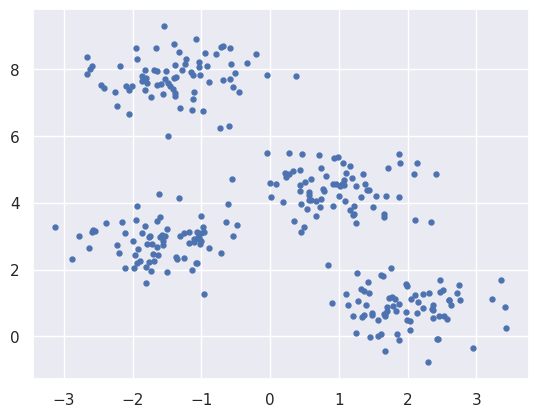

In [1]:
# 產生範例資料
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50, marker ='.');

In [2]:
# 建立kmeans模組並訓練
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [3]:
kmeans.cluster_centers_

array([[ 0.94973532,  4.41906906],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [-1.58438467,  2.83081263]])

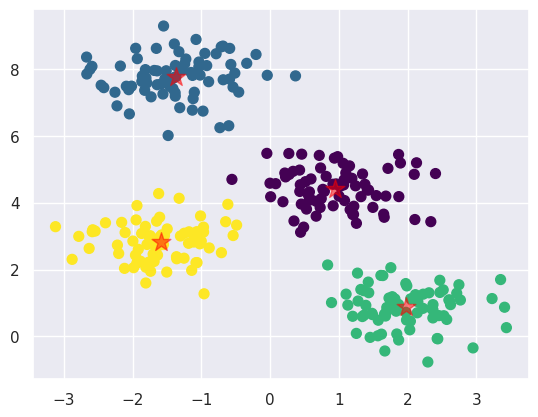

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker ='*');

## 學習過程
![image.png](attachment:image.png)

## K 值的選擇
K值 (群聚類別的數量) 如果選錯了會造成錯誤的結果

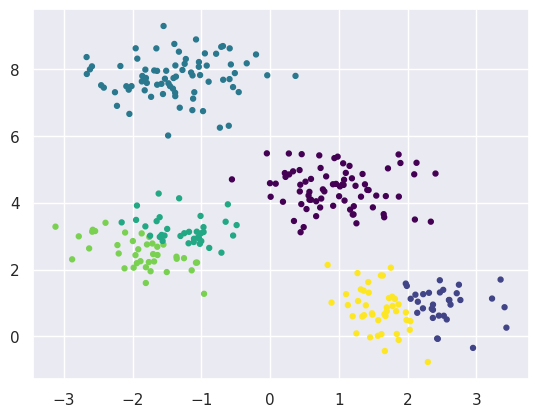

In [5]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis', marker='.');

## K-means只能處理線性分割的問題

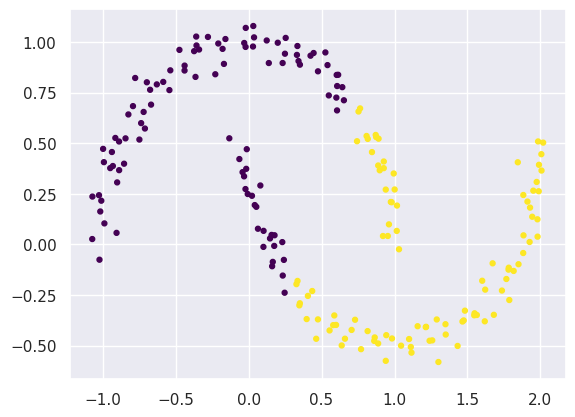

In [6]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis', marker='.');

## SpectralClustering
Kernal版的k-means，可以把輸入變項值投射到高維度去

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


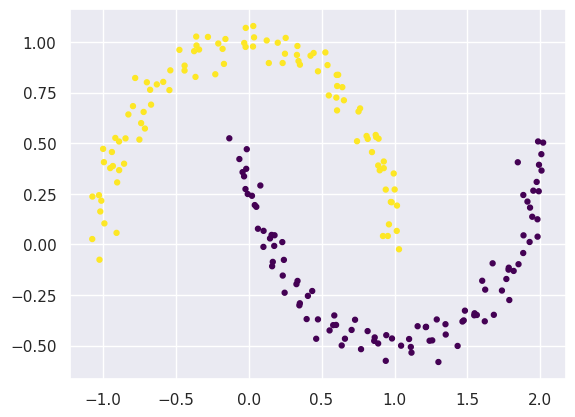

In [7]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', marker='.')

## 範例 -- 手寫數字辨識

In [8]:
# 載入手寫數字的訓練資料
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [9]:
# 訓練 k-means 模組
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

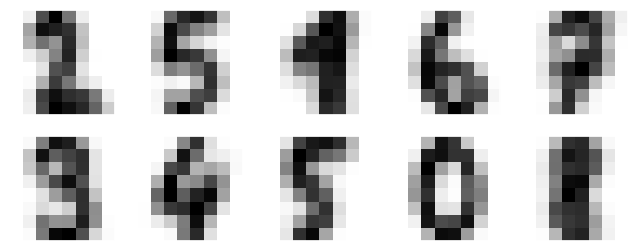

In [10]:
# 將訓練好的 k-means 模組中心點畫出來，從64維度轉換成8*8的點陣圖
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## 範例 -- 圖形色彩壓縮

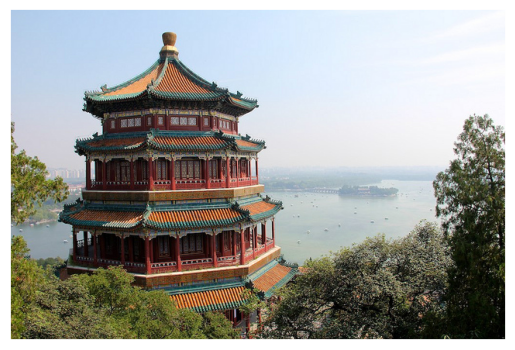

In [11]:
# 載入測試用圖
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);
# plt.imshow(china)

In [12]:
# 圖的基本資料 (寬, 高, 3原色)
china.shape

(427, 640, 3)

In [13]:
# 將資料正規化到 0~1之間
data = china / 255.0 # use 0...1 scale
# 將原本2維的圖形資料展開變成1維
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [14]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

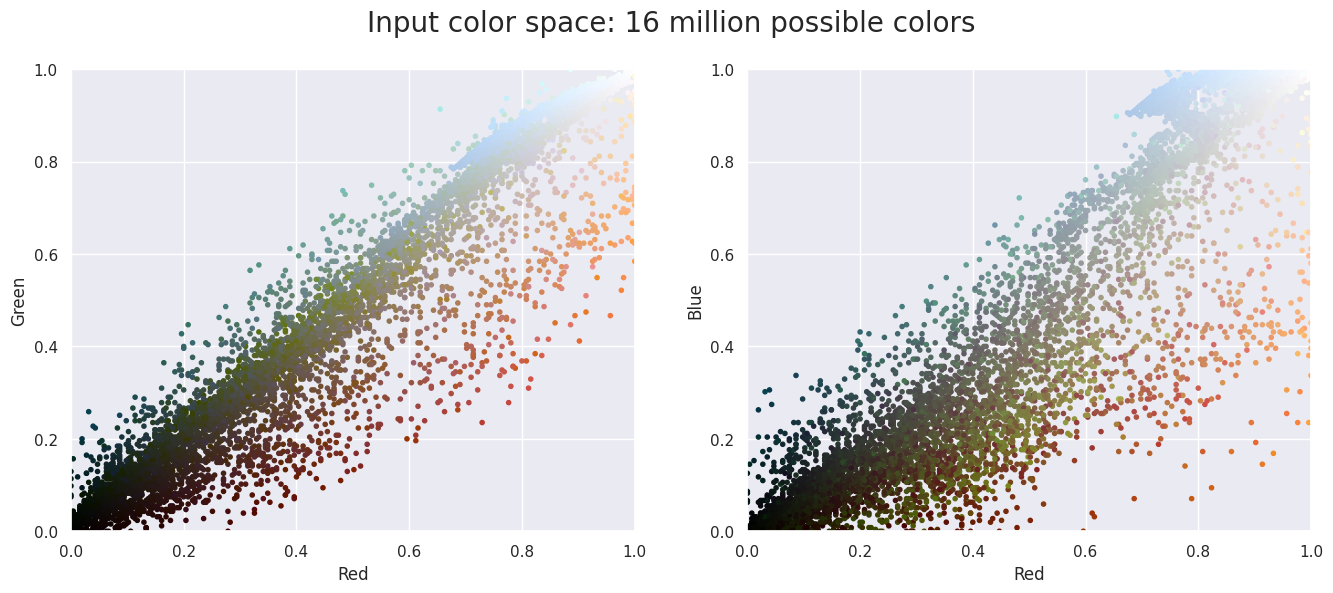

In [15]:
# 將圖形中每個點的顏色畫出來
plot_pixels(data, title='Input color space: 16 million possible colors')

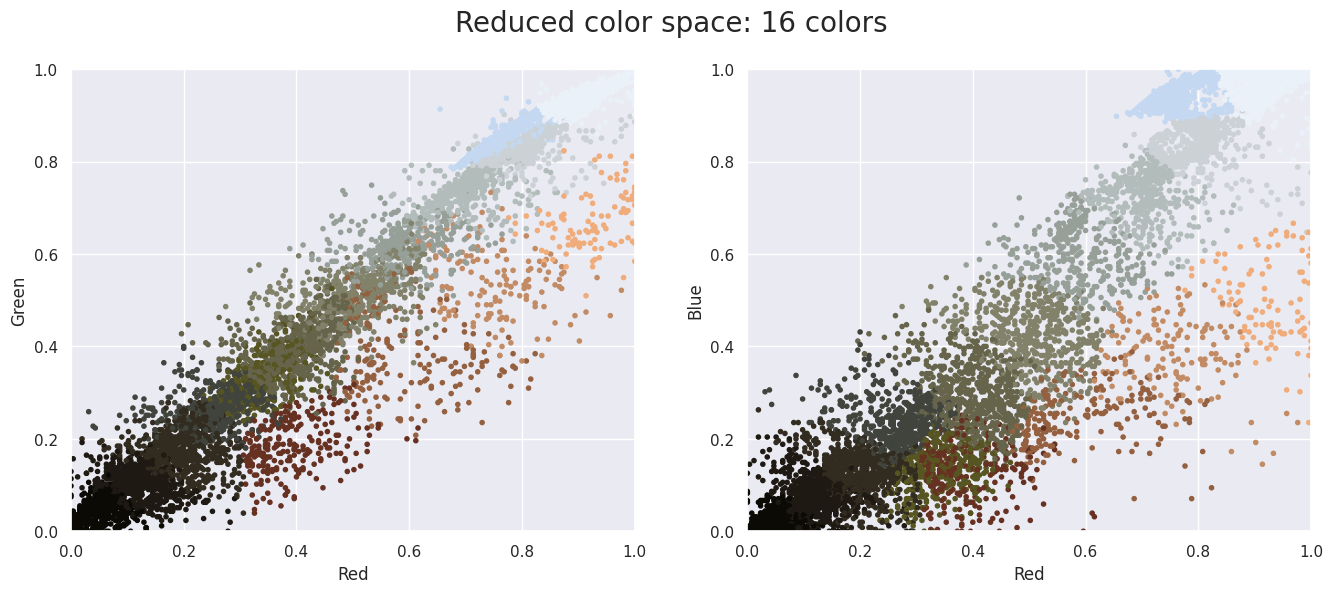

In [16]:
# 使用 k-mean 將顏色壓縮到 16色
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

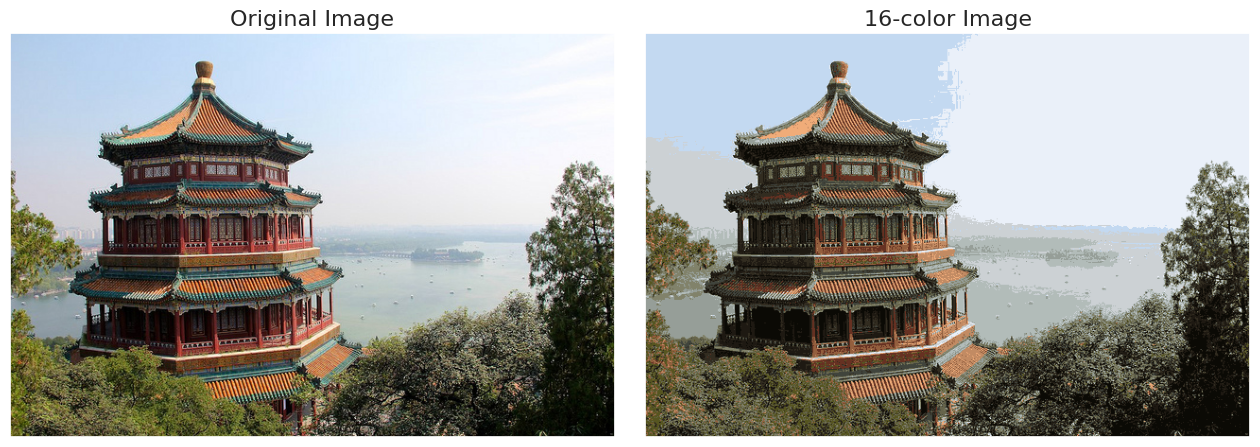

In [17]:
# 展示顏色壓縮結果
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

# 範例

## Iris

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/YiTing/Learning/Python/ML/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


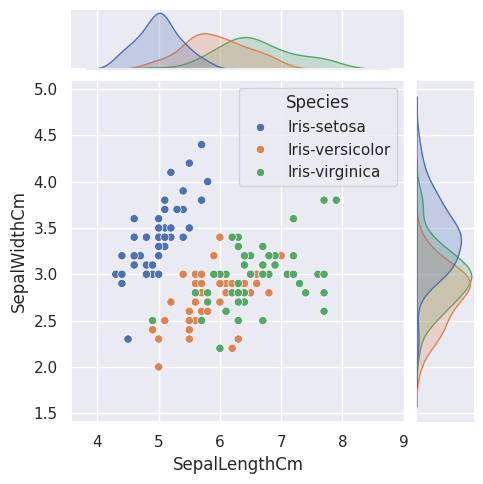

In [22]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=data, height=5, hue='Species')

In [23]:
from sklearn.cluster import KMeans

x = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

model = KMeans(n_clusters=3)
model.fit(x)
y_kmeans = model.predict(x)
data['predict'] = y_kmeans
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predict
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


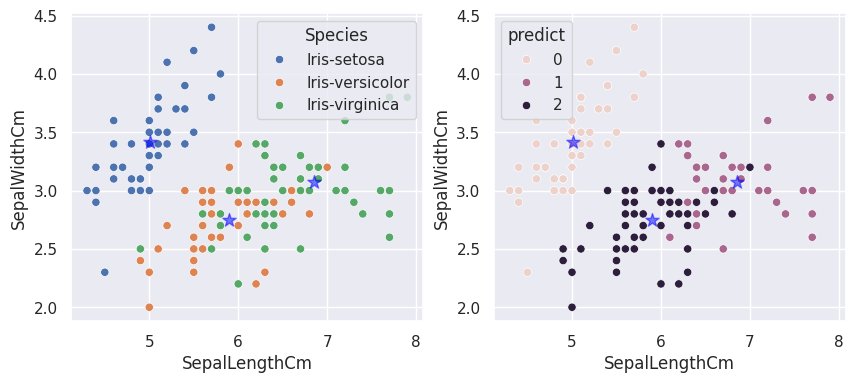

In [24]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", data = data, hue = "Species",ax=axs[0])
centers = model.cluster_centers_
axs[0].scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.5, marker ='*');


sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", data = data, hue = "predict",ax=axs[1])
centers = model.cluster_centers_
axs[1].scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.5, marker ='*');

## 搭配PCA

In [25]:
from sklearn.decomposition import PCA
scaler = PCA()
scaler.fit(x)
x2 = scaler.transform(x)

model = KMeans(n_clusters=3)
model.fit(x2)
y_kmeans = model.predict(x2)
data['predict'] = y_kmeans

### 原始值域

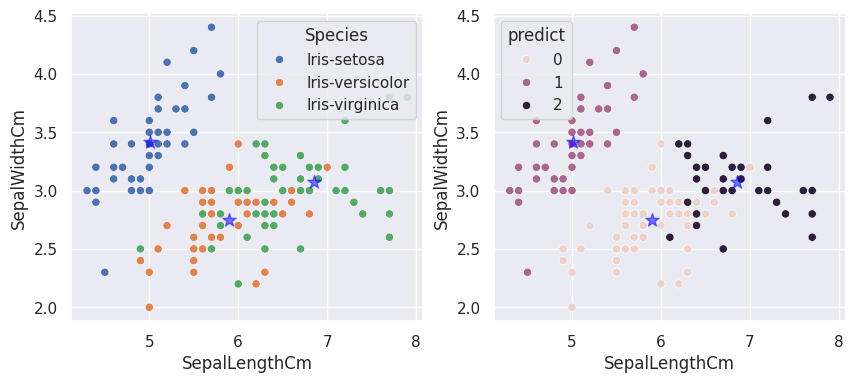

In [26]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", data = data, hue = "Species",ax=axs[0])
centers = scaler.inverse_transform(model.cluster_centers_)
axs[0].scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.5, marker ='*');

sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", data = data, hue = "predict",ax=axs[1])
centers = scaler.inverse_transform(model.cluster_centers_)
axs[1].scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.5, marker ='*');


### PCA值域

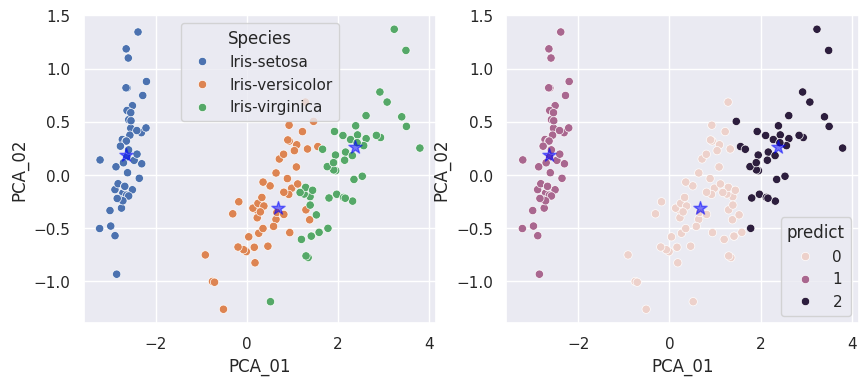

In [27]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10,4))

data['PCA_01'] = x2[:,0]
data['PCA_02'] = x2[:,1]
data['PCA_03'] = x2[:,2]
data['PCA_04'] = x2[:,3]
sns.scatterplot(x = "PCA_01", y = "PCA_02", data = data, hue = "Species",ax=axs[0])
centers = model.cluster_centers_
axs[0].scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.5, marker ='*');

sns.scatterplot(x = "PCA_01", y = "PCA_02", data = data, hue = "predict",ax=axs[1])
centers = model.cluster_centers_
axs[1].scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.5, marker ='*');

## 搭配LDA
這裡只是示範，真正的分群資料是沒有實際值(Y)。無法使用LDA

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
scaler = LinearDiscriminantAnalysis()
scaler.fit(x, data['Species'])
x2 = scaler.transform(x)

model = KMeans(n_clusters=3)
model.fit(x2)
y_kmeans = model.predict(x2)
data['predict'] = y_kmeans

### 原始值域

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

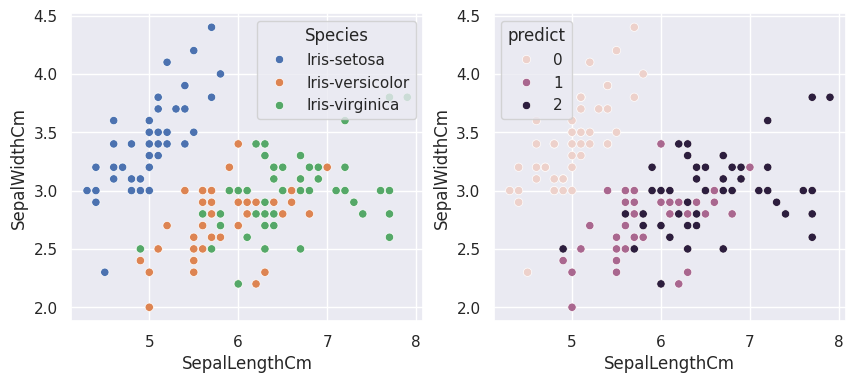

In [29]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", data = data, hue = "Species",ax=axs[0])
sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", data = data, hue = "predict",ax=axs[1])


### LDA值域

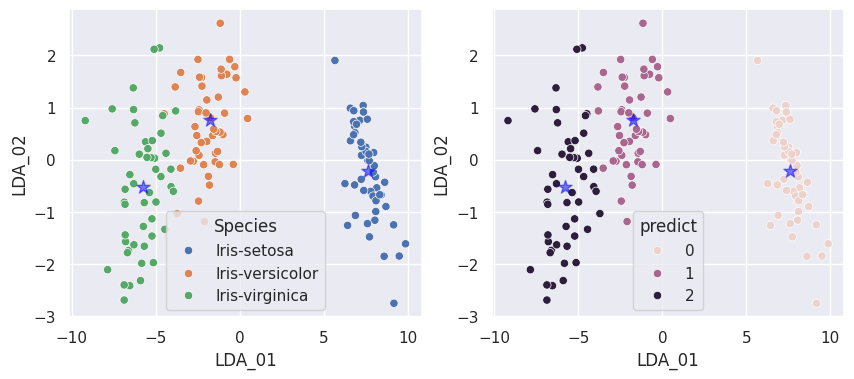

In [30]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10,4))

data['LDA_01'] = x2[:,0]
data['LDA_02'] = x2[:,1]
sns.scatterplot(x = "LDA_01", y = "LDA_02", data = data, hue = "Species",ax=axs[0])
centers = model.cluster_centers_
axs[0].scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.5, marker ='*');

sns.scatterplot(x = "LDA_01", y = "LDA_02", data = data, hue = "predict",ax=axs[1])
centers = model.cluster_centers_
axs[1].scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.5, marker ='*');